<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/OPENCV_PROJECTS/Blending_and_Pasting_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
large_img = cv2.imread('FDN.jpg')
watermark = cv2.imread('Watermark.jpg')

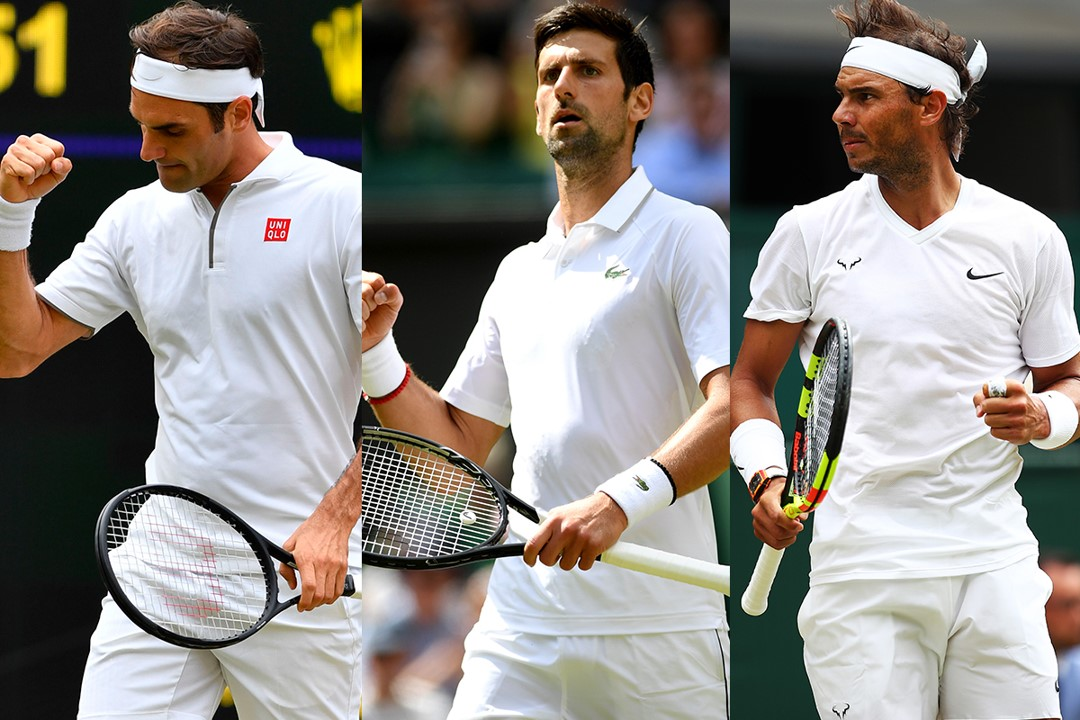

In [ ]:
cv2_imshow(large_img)

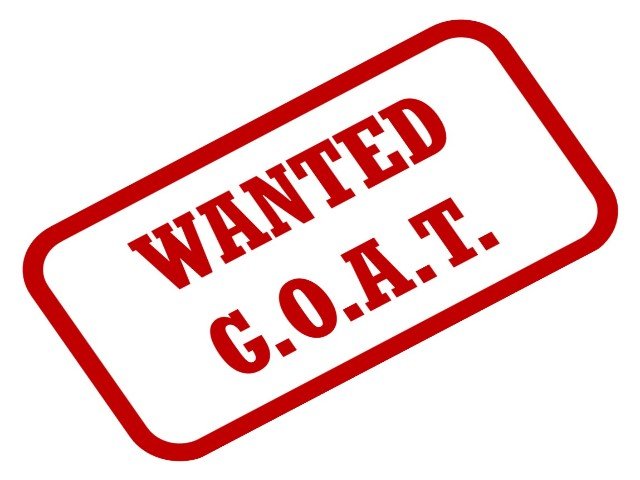

In [ ]:
cv2_imshow(watermark)

In [ ]:
print (large_img.shape)
print (watermark.shape)

(720, 1080, 3)
(480, 640, 3)


In [ ]:
print (watermark.shape)

(480, 640, 3)


In [ ]:
img1 = cv2.resize(large_img,(800,600))
img2 = cv2.resize(watermark,(800,600))

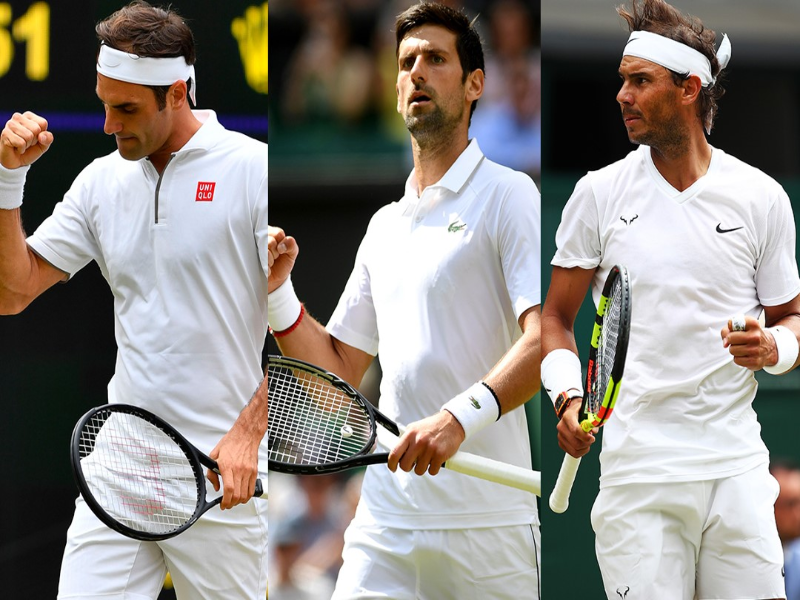

In [ ]:
cv2_imshow(img1)

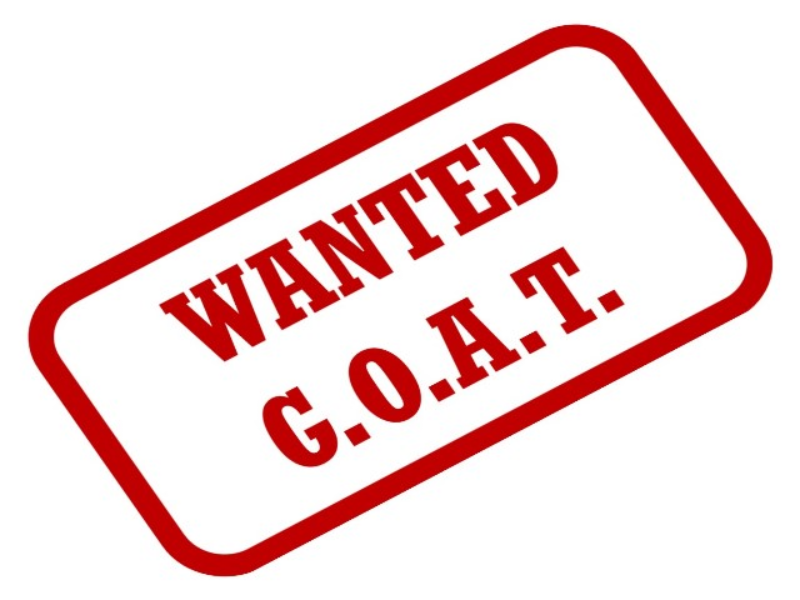

In [ ]:
cv2_imshow(img2)

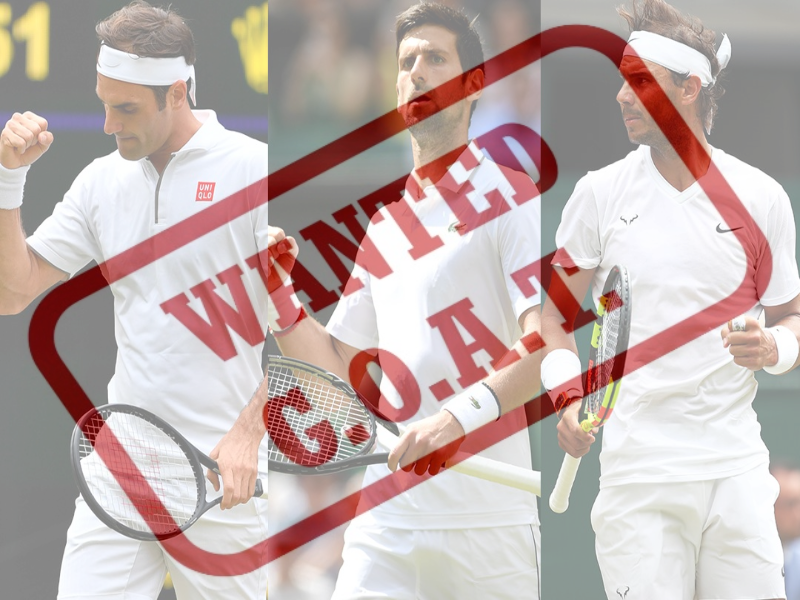

In [ ]:
blended = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
cv2_imshow(blended)

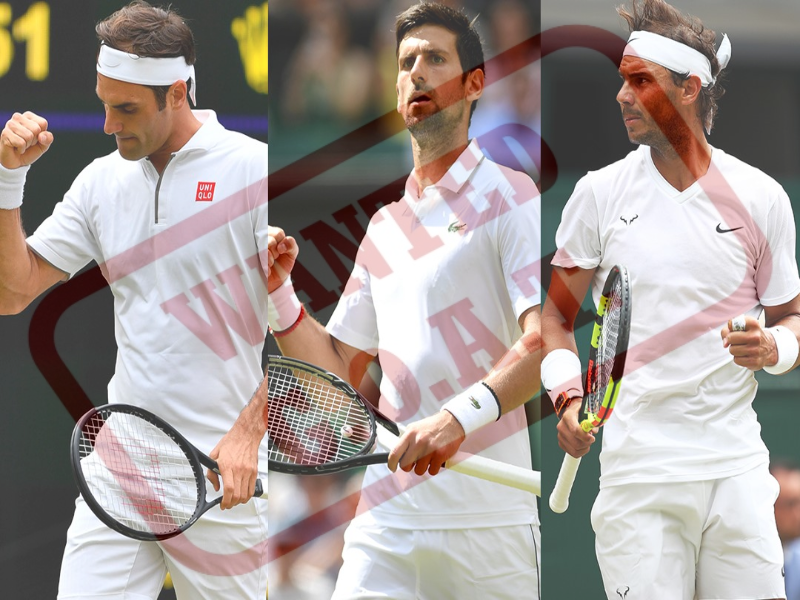

In [ ]:
blended = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)
cv2_imshow(blended)

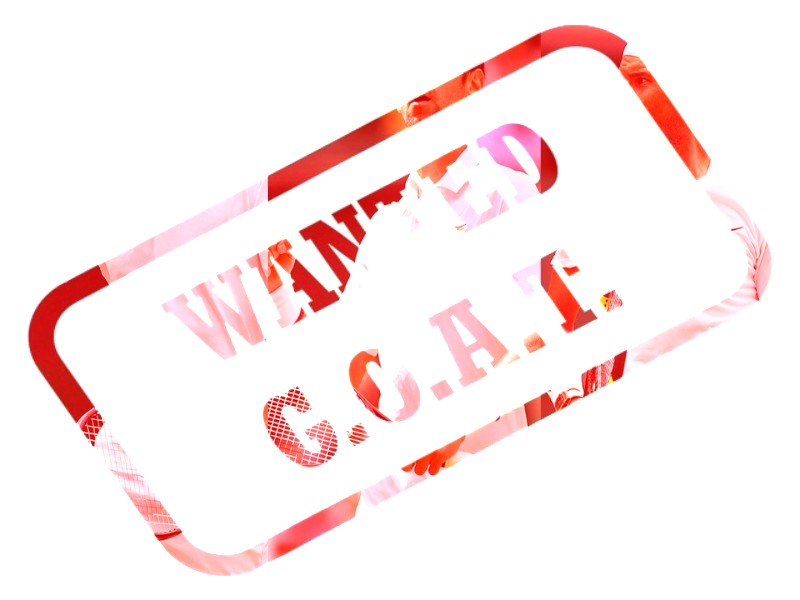

In [ ]:
blended = cv2.addWeighted(img1, 1, img2, 1, 0)
cv2_imshow(blended)

In [ ]:
large_img = cv2.imread('FDN.jpg')
watermark = cv2.imread('Watermark.jpg')

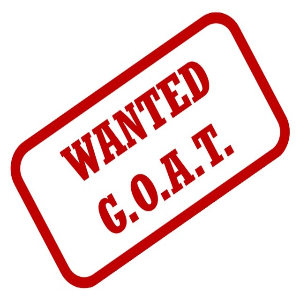

In [ ]:
small_img = cv2.resize(watermark,(300,300))
cv2_imshow(small_img)

In [ ]:
large_img.shape

(720, 1080, 3)

In [ ]:
small_img.shape

(300, 300, 3)

In [ ]:
x_offset = 30
y_offset = 170

In [ ]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [ ]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

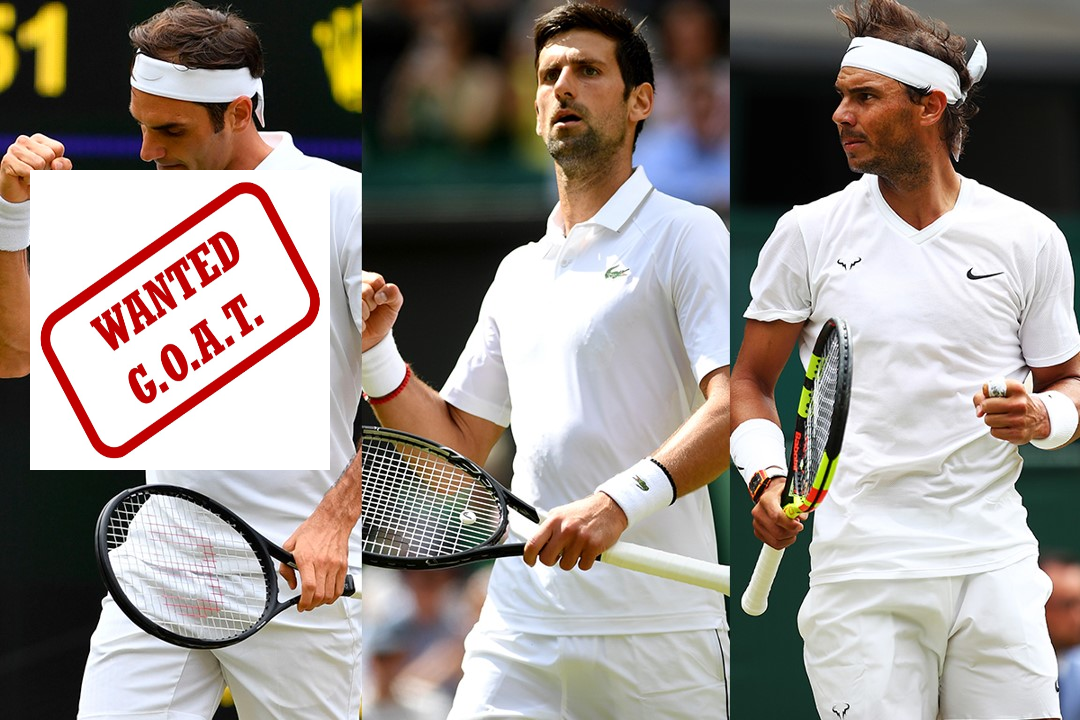

In [ ]:
cv2_imshow(large_img)

In [ ]:
large_img = cv2.imread('FDN.jpg')
watermark = cv2.imread('Watermark.jpg')

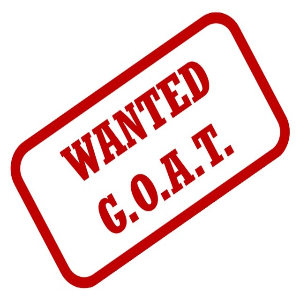

In [ ]:
small_img = cv2.resize(watermark,(300,300))
cv2_imshow(small_img)

In [ ]:
large_img.shape

(720, 1080, 3)

In [ ]:
small_img.shape

(300, 300, 3)

In [ ]:
x_offset = 400
y_offset = 170  

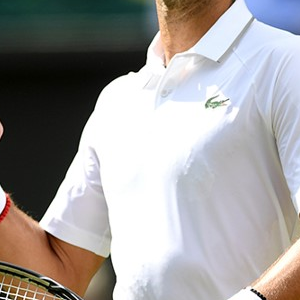

In [ ]:
rows,columns,chanels = small_img.shape
roi = large_img[y_offset:470, x_offset:700]
cv2_imshow(roi)

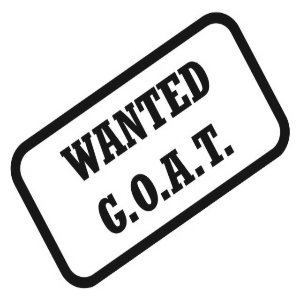

In [ ]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
cv2_imshow(small_img_gray)

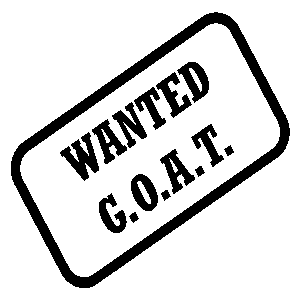

(300, 300)

In [ ]:
ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)
cv2_imshow(mask)
mask.shape

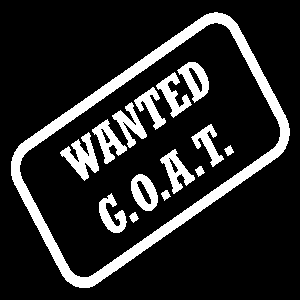

In [ ]:
mask_inv = cv2.bitwise_not(mask)
cv2_imshow(mask_inv)

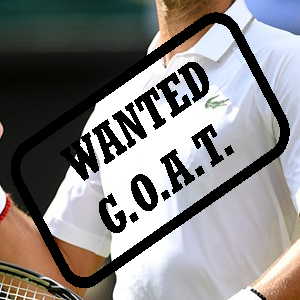

(300, 300, 3)

In [ ]:
bg = cv2.bitwise_or(roi,roi,mask = mask)
cv2_imshow(bg)
bg.shape

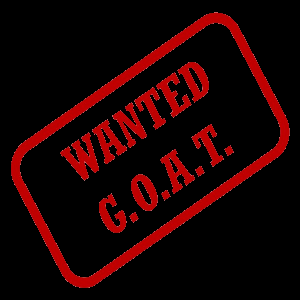

(300, 300, 3)

In [ ]:
fg = cv2.bitwise_and(small_img,small_img, mask=mask_inv)
cv2_imshow(fg)
fg.shape

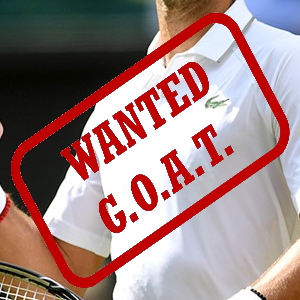

In [ ]:
final_roi = cv2.add(bg,fg)
cv2_imshow(final_roi)

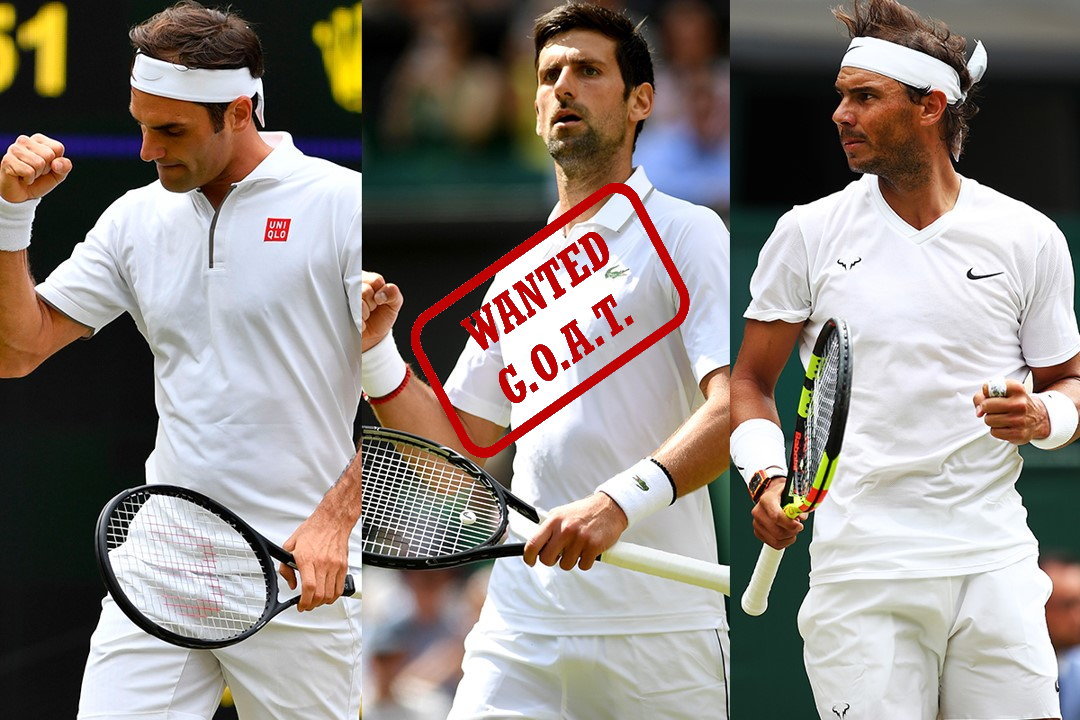

In [ ]:
large_img[y_offset : y_offset + small_img.shape[0], x_offset : x_offset + small_img.shape[1]]= final_roi
cv2_imshow(large_img)